## Problem Statement


*Walmart Managment wants to analyze the  different genders purchasing behaviours and among male or female who purchases more during Black Fridays. With the help of EDA and CLT Theorem, we will be able to analyze the dataset easily*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# For pretty plots
sns.set(style="whitegrid")

In [ ]:
df = pd.read_csv('Walmart_Data.csv')

In [ ]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


*Basic Metrics*

In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
# Convert object type columns to 'category'
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  int64   
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  int64   
 8   Product_Category            550068 non-null  int64   
 9   Purchase                    550068 non-null  int64   
dtypes: category(5), int64(5)
memory usage: 24.3 MB


In [ ]:
#statistical summary
df.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


In [ ]:
#Non-Graphical Analysis: Value Counts
df.value_counts().sum()

np.int64(550068)

In [ ]:
#Non-Graphical Analysis: Unique Attributes
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

User_ID: 5891
Product_ID: 3631
Gender: 2
Age: 7
Occupation: 21
City_Category: 3
Stay_In_Current_City_Years: 5
Marital_Status: 2
Product_Category: 20
Purchase: 18105


*Univariate Analysis*

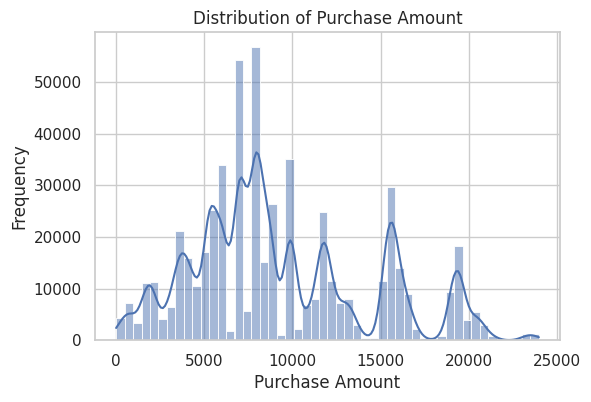

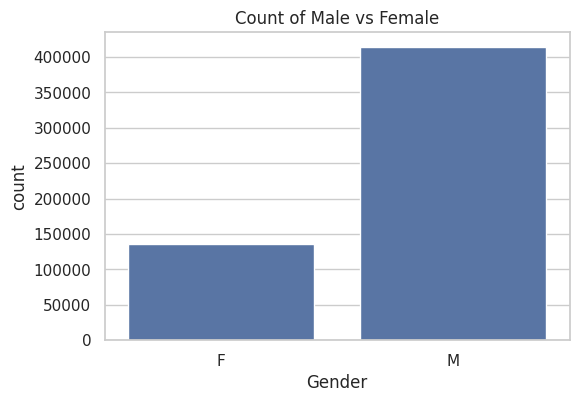

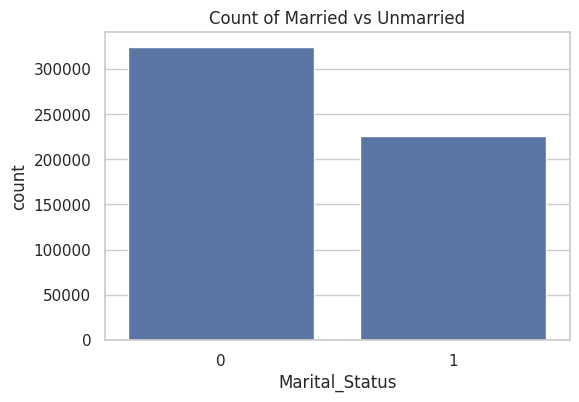

In [ ]:
#For continuous variables:
#Histogram + KDE
plt.figure(figsize=(6,4))
sns.histplot(df['Purchase'], kde=True, bins=50)
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

#CountPlot
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title("Count of Male vs Female")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Marital_Status', data=df)
plt.title("Count of Married vs Unmarried")
plt.show()

*Bivariate Analysis*

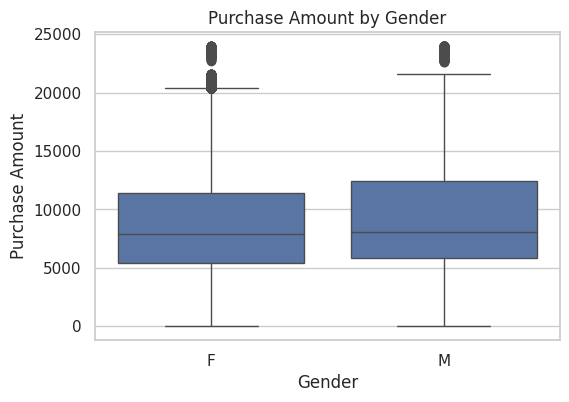

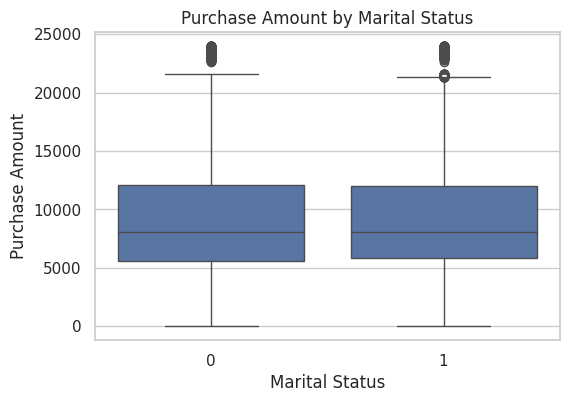

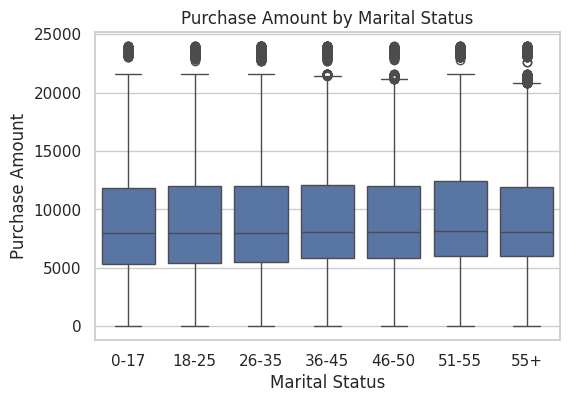

In [ ]:
#Boxplots
plt.figure(figsize=(6,4))
sns.boxplot(x='Gender', y='Purchase', data=df)
plt.title('Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Marital_Status', y='Purchase', data=df)
plt.title('Purchase Amount by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Purchase Amount')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Age', y='Purchase', data=df)
plt.title('Purchase Amount by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Purchase Amount')
plt.show()

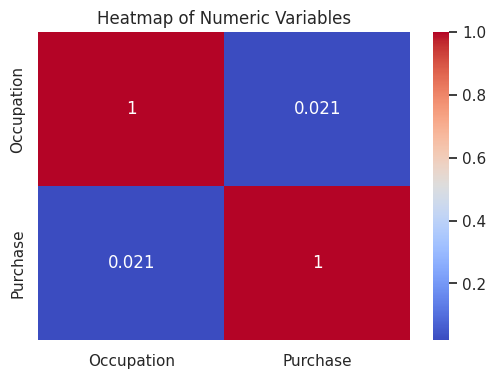

In [ ]:
#For Correlation
plt.figure(figsize=(6,4))
sns.heatmap(df[['Occupation','Purchase']].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap of Numeric Variables")
plt.show()

In [ ]:
#Check Missing Values
print("Missing values per column:\n")
print(df.isnull().sum())


Missing values per column:

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64


*Average Purchase(Gender, Marital, Age)*

In [ ]:
avg_gender = df.groupby('Gender', observed=False)['Purchase'].mean()
avg_marital = df.groupby('Marital_Status', observed=False)['Purchase'].mean()
avg_age = df.groupby('Age', observed=False)['Purchase'].mean()

print("Average Purchase by Gender:")
print(avg_gender)
print("\nAverage Purchase by Marital Status:")
print(avg_marital)
print("\nAverage Purchase by Age:")
print(avg_age)

Average Purchase by Gender:
Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

Average Purchase by Marital Status:
Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

Average Purchase by Age:
Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64


*Confidence intervals for gender*

In [ ]:
#Purchase Data
male_data = df[df['Gender'] == 'M']['Purchase']
female_data = df[df['Gender'] == 'F']['Purchase']

#Sample Mean
male_sample_mean = male_data.mean()
female_sample_mean = female_data.mean()

#Standard Deviation
male_std = male_data.std()
female_std = female_data.std()

#Sample Sizes
n_male = len(male_data)
n_female = len(female_data)

#z-critical
z_critical_male = stats.norm.ppf(q = 0.975)
z_critical_female = stats.norm.ppf(q = 0.975)

#Margin Error
male_margin_error = z_critical_male * (male_std / np.sqrt(n_male))
female_margin_error = z_critical_female * (female_std / np.sqrt(n_female))

#Confidence Interval
male_confidence_interval_lower = male_sample_mean - male_margin_error
male_confidence_interval_upper = male_sample_mean + male_margin_error

female_confidence_interval_lower = female_sample_mean - female_margin_error
female_confidence_interval_upper = female_sample_mean + female_margin_error

print("Male CI Lower and Upper is", f"{male_confidence_interval_lower:.4f}, {male_confidence_interval_upper:.4f}")
print("Female CI Lower and Upper is", f"{female_confidence_interval_lower:.4f}, {female_confidence_interval_upper:.4f}")


#check for overlap
overlap = (male_confidence_interval_lower <= female_confidence_interval_upper) and (female_confidence_interval_lower <= male_confidence_interval_upper)
print(f"\nDo the confidence intervals overlap? {overlap}")

if overlap:
    print("The confidence intervals overlap. This suggests there is no statistically significant difference in the average spending between male and female customers.")
else:
    print("The confidence intervals do not overlap. This suggests there is a statistically significant difference in the average spending between male and female customers.")

Male CI Lower and Upper is 9422.0194, 9453.0326
Female CI Lower and Upper is 8709.2115, 8759.9200

Do the confidence intervals overlap? False
The confidence intervals do not overlap. This suggests there is a statistically significant difference in the average spending between male and female customers.


*Confidence intervals for marital status*

In [ ]:
#Sample Data
married_data = df[df['Marital_Status'] == 1]['Purchase']
unmarried_data = df[df['Marital_Status'] == 0]['Purchase']

#Sample Mean
married_sample_mean = married_data.mean()
unmarried_sample_mean = unmarried_data.mean()

#Standard Deviation
married_std = married_data.std()
unmarried_std = unmarried_data.std()

#Sample Sizes
n_married = len(married_data)
n_unmarried = len(unmarried_data)

#z-critical
z_critical_married = stats.norm.ppf(q = 0.975)
z_critical_unmarried = stats.norm.ppf(q = 0.975)

#Margin Error
married_margin_error = z_critical_married * (married_std / np.sqrt(n_married))
unmarried_margin_error = z_critical_unmarried * (unmarried_std / np.sqrt(n_unmarried))

#Confidence Interval
married_confidence_interval_lower = married_sample_mean - married_margin_error
married_confidence_interval_upper = married_sample_mean + married_margin_error

unmarried_confidence_interval_lower = unmarried_sample_mean - unmarried_margin_error
unmarried_confidence_interval_upper = unmarried_sample_mean + unmarried_margin_error


print("Married CI Lower and Upper is", f"{married_confidence_interval_lower:.4f}, {married_confidence_interval_upper:.4f}")
print("Unmarried CI Lower and Upper is", f"{unmarried_confidence_interval_lower:.4f}, {unmarried_confidence_interval_upper:.4f}")


#check for overlap
overlap = (married_confidence_interval_lower <= unmarried_confidence_interval_upper) and (unmarried_confidence_interval_lower <= married_confidence_interval_upper)
print(f"\nDo the confidence intervals overlap? {overlap}")

if overlap:
    print("The confidence intervals overlap. This suggests there is no statistically significant difference in the average spending between married and unmarried customers.")
else:
    print("The confidence intervals do not overlap. This suggests there is a statistically significant difference in the average spending between married and unmarried customers.")



Married CI Lower and Upper is 9240.4604, 9281.8887
Unmarried CI Lower and Upper is 9248.6164, 9283.1988

Do the confidence intervals overlap? True
The confidence intervals overlap. This suggests there is no statistically significant difference in the average spending between married and unmarried customers.


*Confidence intervals for age*

In [ ]:
age_data = df['Age']

for age in age_data.unique():
    #Sample Data
    age_group_data = df[df['Age'] == age]['Purchase']
    #Sample Mean
    age_group_mean = age_group_data.mean()
    #Standard Deviation
    age_group_std = age_group_data.std()
    #Sample Sizes
    n_age_group = len(age_group_data)
    #z-critical
    z_critical_age_group = stats.norm.ppf(q = 0.975)
    #Margin Error
    age_group_margin_error = z_critical_age_group * (age_group_std / np.sqrt(n_age_group))
    #Confidence Interval
    age_group_confidence_interval_lower = age_group_mean - age_group_margin_error
    age_group_confidence_interval_upper = age_group_mean + age_group_margin_error
    print(f"Age Group {age}: CI Lower and Upper is {age_group_confidence_interval_lower:.4f}, {age_group_confidence_interval_upper:.4f}")


#check for overlap
overlap = (age_group_confidence_interval_lower <= age_group_confidence_interval_upper)
print(f"\nDo the confidence intervals overlap? {overlap}")

if overlap:
    print("The confidence intervals overlap. This suggests there is no statistically significant difference in the average spending between age groups.")
else:
    print("The confidence intervals do not overlap. This suggests there is a statistically significant difference in the average spending between age groups.")


Age Group 0-17: CI Lower and Upper is 8851.9480, 9014.9813
Age Group 55+: CI Lower and Upper is 9269.2988, 9403.2621
Age Group 26-35: CI Lower and Upper is 9231.7337, 9273.6476
Age Group 46-50: CI Lower and Upper is 9163.0851, 9254.1663
Age Group 51-55: CI Lower and Upper is 9483.9915, 9585.6246
Age Group 36-45: CI Lower and Upper is 9301.6694, 9361.0320
Age Group 18-25: CI Lower and Upper is 9138.4079, 9200.9193

Do the confidence intervals overlap? True
The confidence intervals overlap. This suggests there is no statistically significant difference in the average spending between age groups.


**Recommendations for Walmart:**

*   **Focus on Male Shoppers:** They have a statistically higher average spending. Target marketing and products towards men.
*   **Analyze Product Categories:** Identify popular products among male customers for better inventory and display.
*   **Consider Age Groups:** Explore spending patterns within specific age groups for targeted offers, although the differences are less significant than gender.
*   **Marital Status is Less Critical:** Average spending is similar for married and unmarried customers.
*   **Continue EDA:** Use data analysis to find other trends in Occupation, City, etc.
*   **Utilize CLT for Insights:** Apply statistical methods (like confidence intervals) to understand customer behavior with confidence.